<a href="https://colab.research.google.com/github/jvpalhares/deep-learning-rnn-udemy/blob/main/LongDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.7.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [5]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
79/79 [==============================] - 1s 3ms/step - loss: 0.7564 - accuracy: 0.4960 - val_loss: 0.7019 - val_accuracy: 0.5072
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5004 - val_loss: 0.6940 - val_accuracy: 0.5144
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5048 - val_loss: 0.6953 - val_accuracy: 0.4848
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4960 - val_loss: 0.6944 - val_accuracy: 0.5020
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4844 - val_loss: 0.6956 - val_accuracy: 0.4972
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4880 - val_loss: 0.6955 - val_accuracy: 0.4984
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5048 - val_loss: 0.6949 - val_accuracy: 0.4924
Epoch 8/100
7

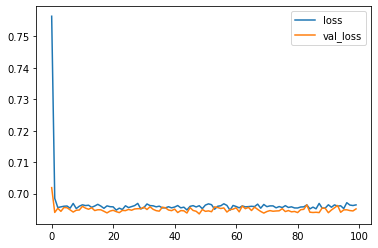

In [6]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

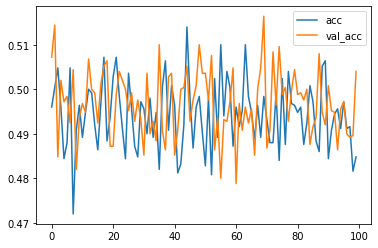

In [7]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6899 - accuracy: 0.5452 - val_loss: 0.6755 - val_accuracy: 0.5924
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6256 - val_loss: 0.6531 - val_accuracy: 0.6336
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6265 - accuracy: 0.6816 - val_loss: 0.6096 - val_accuracy: 0.6844
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7388 - val_loss: 0.5455 - val_accuracy: 0.7424
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7788 - val_loss: 0.4836 - val_accuracy: 0.8012
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.8272 - val_loss: 0.4142 - val_accuracy: 0.8336
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8644 - val_loss: 0.3415 - val_accuracy: 0.8780
Epoch 8/200
7

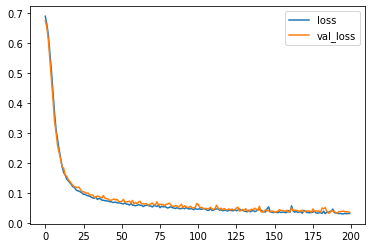

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

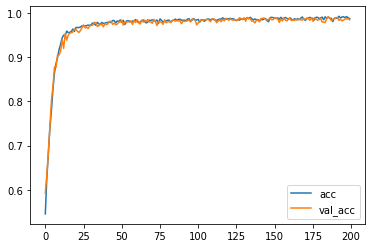

In [11]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [13]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
79/79 [==============================] - 1s 6ms/step - loss: 0.7011 - accuracy: 0.5072 - val_loss: 0.6953 - val_accuracy: 0.5104
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5464 - val_loss: 0.6926 - val_accuracy: 0.5424
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5636 - val_loss: 0.6852 - val_accuracy: 0.5716
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5908 - val_loss: 0.6855 - val_accuracy: 0.5696
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6722 - accuracy: 0.6028 - val_loss: 0.6875 - val_accuracy: 0.5704
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6036 - val_loss: 0.6835 - val_accuracy: 0.5804
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6080 - val_loss: 0.6795 - val_accuracy: 0.5908
Epoch 8/200
7

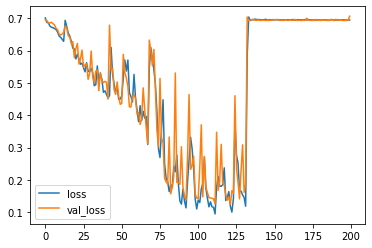

In [14]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

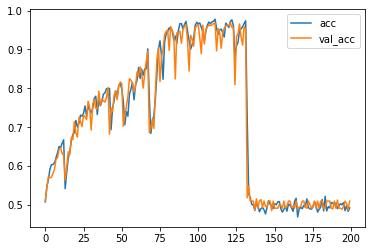

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
79/79 [==============================] - 2s 11ms/step - loss: 0.6949 - accuracy: 0.5092 - val_loss: 0.6939 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4936 - val_loss: 0.6929 - val_accuracy: 0.5092
Epoch 3/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.4924 - val_loss: 0.6930 - val_accuracy: 0.5116
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5164 - val_loss: 0.6910 - val_accuracy: 0.5412
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.5400 - val_loss: 0.6840 - val_accuracy: 0.5656
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5532 - val_loss: 0.6856 - val_accuracy: 0.5632
Epoch 8/200


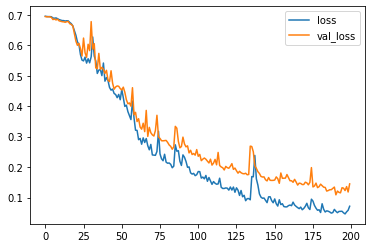

In [17]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

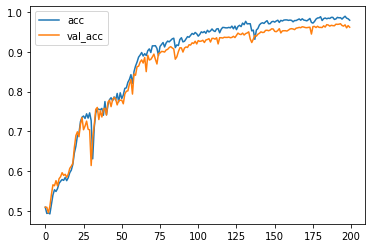

In [18]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [20]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7004 - accuracy: 0.5032 - val_loss: 0.6980 - val_accuracy: 0.4924
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5156 - val_loss: 0.7013 - val_accuracy: 0.4928
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.5120 - val_loss: 0.6981 - val_accuracy: 0.5088
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.5152 - val_loss: 0.6943 - val_accuracy: 0.5112
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.5004 - val_loss: 0.6974 - val_accuracy: 0.4984
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5108 - val_loss: 0.6955 - val_accuracy: 0.4956
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5288 - val_loss: 0.6941 - val_accuracy: 0.5060
Epoch 8/200
7

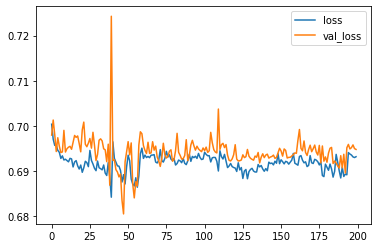

In [21]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

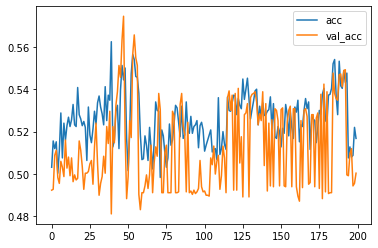

In [22]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [23]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
79/79 [==============================] - 3s 14ms/step - loss: 0.6950 - accuracy: 0.4992 - val_loss: 0.6928 - val_accuracy: 0.5100
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5124 - val_loss: 0.6922 - val_accuracy: 0.5240
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6939 - val_accuracy: 0.4920
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6946 - val_accuracy: 0.4912
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6923 - accuracy: 0.5216 - val_loss: 0.6935 - val_accuracy: 0.4976
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6950 - val_accuracy: 0.4928
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5208 - val_loss: 0.6945 - val_accuracy: 0.4936
Epoch 8/200


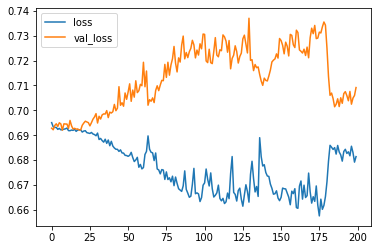

In [24]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

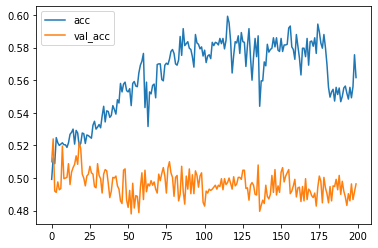

In [25]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [26]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
79/79 [==============================] - 3s 14ms/step - loss: 0.6941 - accuracy: 0.5084 - val_loss: 0.6968 - val_accuracy: 0.4940
Epoch 2/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6950 - val_accuracy: 0.4984
Epoch 3/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5104 - val_loss: 0.6950 - val_accuracy: 0.5008
Epoch 4/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5144 - val_loss: 0.6958 - val_accuracy: 0.4960
Epoch 5/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5208 - val_loss: 0.6922 - val_accuracy: 0.5148
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5184 - val_loss: 0.6935 - val_accuracy: 0.5068
Epoch 7/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5216 - val_loss: 0.6929 - val_accuracy: 0.5092
Epoch 8/40

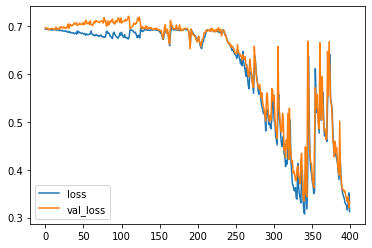

In [27]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

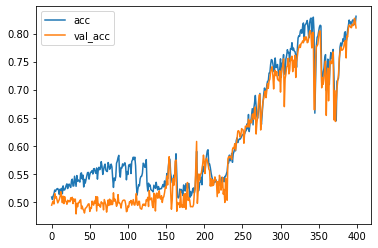

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [29]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [30]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
79/79 [==============================] - 3s 17ms/step - loss: 0.6943 - accuracy: 0.5052 - val_loss: 0.6988 - val_accuracy: 0.4900
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6943 - val_accuracy: 0.4864
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5112 - val_loss: 0.6957 - val_accuracy: 0.4964
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5128 - val_loss: 0.6951 - val_accuracy: 0.4868
Epoch 5/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5076 - val_loss: 0.6946 - val_accuracy: 0.4880
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6945 - val_accuracy: 0.4908
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5196 - val_loss: 0.6951 - val_accuracy: 0.4856
Epoch 

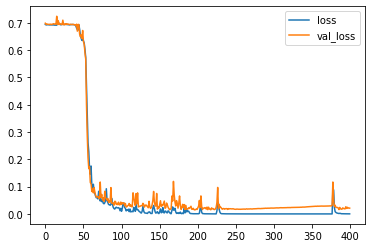

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

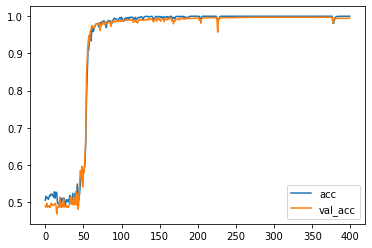

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
79/79 [==============================] - 3s 17ms/step - loss: 0.6948 - accuracy: 0.4932 - val_loss: 0.6951 - val_accuracy: 0.4872
Epoch 2/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6944 - accuracy: 0.5028 - val_loss: 0.6950 - val_accuracy: 0.4868
Epoch 3/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.4884
Epoch 4/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6940 - val_accuracy: 0.4872
Epoch 5/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6942 - val_accuracy: 0.4868
Epoch 6/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.4984 - val_loss: 0.6946 - val_accuracy: 0.4868
Epoch 7/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5128 - val_loss: 0.6940 - val_accuracy: 0.4928
Epoch 

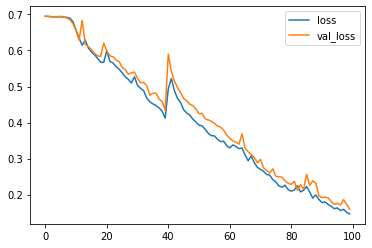

In [34]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

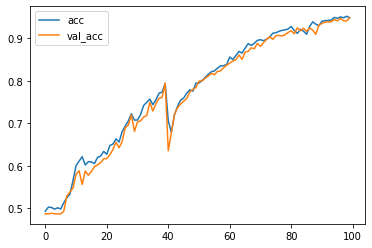

In [35]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()